In [1]:
from sys import getsizeof
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
import json

# Load Data

In [2]:
# data = pd.read_json('./mag_papers_0/mag_papers_0.txt', lines = True)
# mag_subset20K = data.iloc[0:20000, :]
# mag_subset20K.to_json('mag_subset20K.txt')

In [3]:
model_df = pd.read_json('mag_subset20K.txt')

In [4]:
model_df.shape

(20000, 19)

In [5]:
# model_df.T.loc[:, [6, 13, 14]].to_csv('columns_example.csv')

- 只保留英文文章，以及6個特徵值: **abstract**, **authors**, **fos**, **keywords**, **year**, **title**

In [6]:
# filter out non-English articles
# keep abstract, authors, fos, keywords, year, title
model_df = model_df[model_df.lang == 'en'].drop_duplicates(subset = 'title', 
                                                           keep = 'first').drop(['doc_type', 
                                                                                 'doi', 
                                                                                 'id', 
                                                                                 'issue', 
                                                                                 'lang', 
                                                                                 'n_citation', 
                                                                                 'page_end', 
                                                                                 'page_start', 
                                                                                 'publisher', 
                                                                                 'references',
                                                                                 'url',
                                                                                 'venue',
                                                                                 'volume'],
                                                                                axis = 1)

model_df.shape

(10399, 6)

In [7]:
model_df.head(10)

,abstract,authors,fos,keywords,title,year
0,A system and method for maskless direct write ...,None,"[Electronic engineering, Computer hardware, En...",None,System and Method for Maskless Direct Write Li...,2015
1,None,[{'name': 'Ahmed M. Alluwaimi'}],"[Biology, Virology, Immunology, Microbiology]","[paratuberculosis, of, subspecies, proceedings...",The dilemma of the Mycobacterium avium subspec...,2016
10,None,"[{'name': 'Gyorgy Targoński'}, {'name': 'Marek...",None,[matematyka],Generators and co-generators of substitution s...,1985
1000,The present invention relates to a process for...,"[{'name': 'Chung-Jen Wu'}, {'name': 'Wang Me'}...","[Materials Science, Composite material, Polyme...",None,Precursor solution for polyimide/silica compos...,2005
10001,None,"[{'name': 'Niramol Savaraj', 'org': 'Universit...",None,None,"Clinical pharmacokinetics of 1,4 dihydroxy-5-8...",1981
10002,We reanalyzed 26 samples from radon progeny pa...,"[{'name': 'E.O. Knutson'}, {'name': 'A.C. Geor...","[Chemistry, Mineralogy, Forensic engineering, ...","[distribution, biology and medicine applied st...",Reanalysis of data on particle size distributi...,1992
10003,Eukaryotic protein disulfide isomerase (PDI) i...,"[{'name': 'Marc Ostermeier'}, {'name': 'Kristi...","[Biology, Biochemistry, Molecular biology, Pro...",[science general],Eukaryotic Protein Disulfide Isomerase Complem...,1996
10004,"An amplitude control system comprising, arrang...","[{'name': 'De Kleijn'}, {'name': 'J Albertus'}]","[Control engineering, Electronic engineering, ...",None,Amplitude control system,1984
10009,OBJECTIFS : Suite a l’implantation d’un progr...,"[{'name': 'Virginie Gosselin', 'org': 'Communi...",None,"[vaccins contre le rotavirus, rotavirus infect...",Trends in severe gastroenteritis among young c...,2016
1001,None,[{'name': 'N. Schoknecht'}],"[Regosol, Geomorphology, Geography, Soil scien...","[soil classification, soil types, land use, so...",Soil groups of Western Australia : a simple gu...,1997


In [8]:
unique_fos = sorted(list({ feature
                          for paper_row in model_df.fos.fillna('0')
                          for feature in paper_row }))

In [9]:
unique_fos

['0',
 '0-10 V lighting control',
 '1/N expansion',
 '10G-PON',
 '14-3-3 protein',
 '2-choice hashing',
 '20th-century philosophy',
 '2D computer graphics',
 '2DEG',
 '3-D Secure',
 '3D computer graphics',
 '3D radar',
 '3D reconstruction',
 '3D single-object recognition',
 '3G',
 '3G MIMO',
 '40-bit encryption',
 '5-HT1 receptor',
 '5-HT2 receptor',
 '5-HT5A receptor',
 '5052 aluminium alloy',
 '56-bit encryption',
 '6111 aluminium alloy',
 '78xx',
 'ABO blood group system',
 'AC motor',
 'AI-complete',
 'AIM2',
 'AM/FM/GIS',
 'AMPA receptor',
 'ANK1',
 'ASK1',
 'ATP-binding cassette transporter',
 'ATPase',
 'AXL receptor tyrosine kinase',
 'Ab initio quantum chemistry methods',
 'Abductive logic programming',
 'Abell 2744',
 'Abiogenesis',
 'Abiotic stress',
 'Absolute deviation',
 'Absolute return',
 'Absorbed dose',
 'Absorption',
 'Absorption spectroscopy',
 'Abstract family of languages',
 'Acceleration',
 'Accelerator mass spectrometry',
 'Access control',
 'Access method',
 'A

In [10]:
unique_year = sorted(model_df.year.astype('str').unique())

In [11]:
len(unique_fos + unique_year)

7760

In [12]:
model_df.shape[0] - model_df.fos.isna().sum()

8666

In [13]:
import random
random.seed(1)
[unique_fos[i] for i in sorted(random.sample(range(len(unique_fos)), 15)) ]

['Beryllium',
 'Chemical kinetics',
 'Coaxial antenna',
 'Electrical impedance tomography',
 'Heterozygote advantage',
 'Köhler illumination',
 'Literary fiction',
 'Massive compact halo object',
 'North American Model of Wildlife Conservation',
 'Predictive value of tests',
 'Simulation modeling',
 'Skin conductance',
 'Species richness',
 'Statistical inference',
 'Tetrameter']

- Beryllium: 鈹 Be
- Chemical kinetics: 化學動力學
- Coaxial antenna: 同軸天線

In [19]:
model_df.fos.head()

0        [Electronic engineering, Computer hardware, En...
1            [Biology, Virology, Immunology, Microbiology]
10                                                    None
1000     [Materials Science, Composite material, Polyme...
10001                                                 None
Name: fos, dtype: object

In [14]:
def feature_array(x, unique_array):
    row_dict = {}
    for i in x.index:
        var_dict = {}
        
        for j in range(len(unique_array)):
            if type(x[i]) is list:
                if unique_array[j] in x[i]:
                    var_dict.update({unique_array[j]: 1})
                else:
                    var_dict.update({unique_array[j]: 0})
            else:    
                if unique_array[j] == str(x[i]):
                    var_dict.update({unique_array[j]: 1})
                else:
                    var_dict.update({unique_array[j]: 0})
        
        row_dict.update({i : var_dict})
    
    feature_df = pd.DataFrame.from_dict(row_dict, dtype='str').T
    
    return feature_df

In [15]:
%%time 
year_features = feature_array(model_df['year'], unique_year)

Wall time: 32.7 s


In [16]:
year_features.sort_index().head()

,1831,1832,1833,1834,1836,1837,1840,1841,1845,1847,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
# %%time 
# fos_features = feature_array(model_df['fos'], unique_fos)

Wall time: 32min 9s


In [20]:
fos_features = pd.read_pickle('fos_features.pkl')

In [21]:
fos_features.sort_index().head()

,0,0-10 V lighting control,1/N expansion,10G-PON,14-3-3 protein,2-choice hashing,20th-century philosophy,2D computer graphics,2DEG,3-D Secure,...,k-nearest neighbors algorithm,m-derived filter,microRNA,pH,photoperiodism,route,strictfp,string,Ćuk converter,μ operator
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# fos_features.to_pickle('fos_features.pkl')

In [22]:
year_features.shape[1] + fos_features.shape[1]

7760

In [23]:
# now looking at 10399 x  7760 array for our feature space
%time first_features = fos_features.join(year_features).T

first_size = getsizeof(first_features)

print('Size of first feature array: ', first_size)

Wall time: 7.66 s
Size of first feature array:  5003741538


- 5GB!

In [25]:
first_features.shape

(7760, 10399)

In [26]:
first_features = first_features.T.sort_index().T
first_features = first_features.astype('int')

In [27]:
first_features.head()

,0,1,2,5,7,8,9,10,11,12,...,19985,19986,19987,19988,19993,19994,19995,19997,19998,19999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0-10 V lighting control,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/N expansion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10G-PON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14-3-3 protein,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from scipy.spatial.distance import cosine

def item_collab_filter(features_df):
    item_similarities = pd.DataFrame(index = features_df.columns, columns = features_df.columns)
    
    for i in features_df.columns:
        for j in features_df.columns:
            item_similarities.loc[i][j] = 1 - cosine(features_df[i], features_df[j])
    
    return item_similarities

In [29]:
first_features.loc[:, 0:1000].shape

(7760, 515)

In [30]:
%%time 
first_items = item_collab_filter(first_features.loc[:, 0:1000])

Wall time: 1min 10s


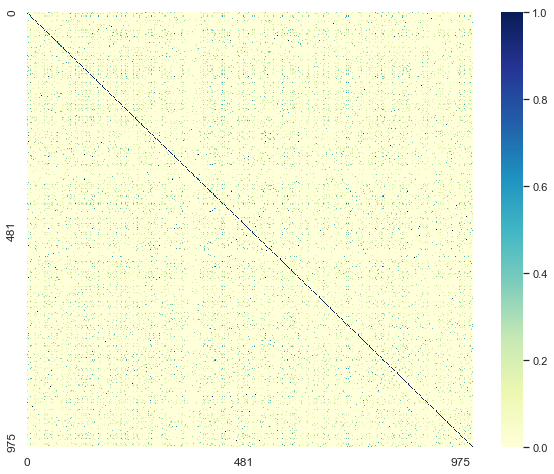

In [31]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.heatmap(first_items.fillna(0), 
                 vmin=0, 
                 vmax=1, 
                 cmap="YlGnBu", 
                 xticklabels=250, 
                 yticklabels=250)

ax.tick_params(labelsize=12)

In [80]:
def paper_recommender(paper_index, items_df):
    print('Based on the paper: \nindex = ', paper_index)
    print(model_df.loc[paper_index])
    top_results = items_df.loc[paper_index].sort_values(ascending=False).head(4)
    print('\nTop three results: ') 
    order = 1
    for i in top_results.index.tolist()[-3:]:
        print(order,'. Paper index = ', i)
        print('Similarity score: ', top_results[i])
        print(model_df.loc[i], '\n')
        if order < 5: order += 1

In [81]:
paper_recommender(2, first_items)

Based on the paper: 
index =  2
abstract                                                 None
authors     [{'name': 'Jovana P. Lekovich', 'org': 'Weill ...
fos                                                      None
keywords                                                 None
title       Should endometriosis be an indication for intr...
year                                                     2015
Name: 2, dtype: object

Top three results: 
1 . Paper index =  2
Similarity score:  1.0
abstract                                                 None
authors     [{'name': 'Jovana P. Lekovich', 'org': 'Weill ...
fos                                                      None
keywords                                                 None
title       Should endometriosis be an indication for intr...
year                                                     2015
Name: 2, dtype: object 

2 . Paper index =  292
Similarity score:  1.0
abstract                                                 None
aut

# Take2

- Numerical features broadly distributed across a dataset can unnecessarily increase the size of our feature space. Let's wrangle this in first.

In [32]:
print("Year spread: ", model_df['year'].min()," - ", model_df['year'].max())
print("Quantile spread:\n", model_df['year'].quantile([0.25, 0.5, 0.75]))

Year spread:  1831  -  2017
Quantile spread:
 0.25    1990.0
0.50    2005.0
0.75    2012.0
Name: year, dtype: float64


Text(0, 0.5, 'Occurrence')

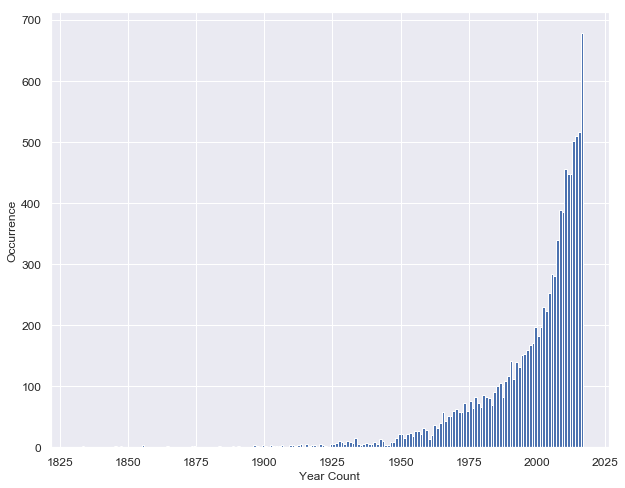

In [33]:
# plot years to see the distribution
fig, ax = plt.subplots()
model_df['year'].hist(ax=ax, bins= model_df['year'].max() - model_df['year'].min())
ax.tick_params(labelsize=12)
ax.set_xlabel('Year Count', fontsize=12)
ax.set_ylabel('Occurrence', fontsize=12)

In [34]:
# we'll base our bins on the range of the variable, rather than the unique number of features
model_df['year'].max() - model_df['year'].min()

186

In [35]:
# binning here (by 10 years)
bins = int(round((model_df['year'].max() - model_df['year'].min()) / 10))

temp_df = pd.DataFrame(index = model_df.index)
temp_df['yearBinned'] = pd.cut(model_df['year'].tolist(), bins, precision = 0)

In [36]:
# now we only have as many bins as we created(grouping together by 10 years)
print('We have reduced from', len(model_df['year'].unique()),
      'to', len(temp_df['yearBinned'].values.unique()), 'features representing the year.')

We have reduced from 156 to 19 features representing the year.


In [37]:
X_yrs = pd.get_dummies(temp_df['yearBinned'])
X_yrs.head()

,"(1831.0, 1841.0]","(1841.0, 1851.0]","(1851.0, 1860.0]","(1860.0, 1870.0]","(1870.0, 1880.0]","(1880.0, 1890.0]","(1890.0, 1900.0]","(1900.0, 1909.0]","(1909.0, 1919.0]","(1919.0, 1929.0]","(1929.0, 1939.0]","(1939.0, 1948.0]","(1948.0, 1958.0]","(1958.0, 1968.0]","(1968.0, 1978.0]","(1978.0, 1988.0]","(1988.0, 1997.0]","(1997.0, 2007.0]","(2007.0, 2017.0]"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [38]:
X_yrs.columns.categories

IntervalIndex([(1831.0, 1841.0], (1841.0, 1851.0], (1851.0, 1860.0], (1860.0, 1870.0], (1870.0, 1880.0] ... (1968.0, 1978.0], (1978.0, 1988.0], (1988.0, 1997.0], (1997.0, 2007.0], (2007.0, 2017.0]]
              closed='right',
              dtype='interval[float64]')

Text(0, 0.5, 'Counts')

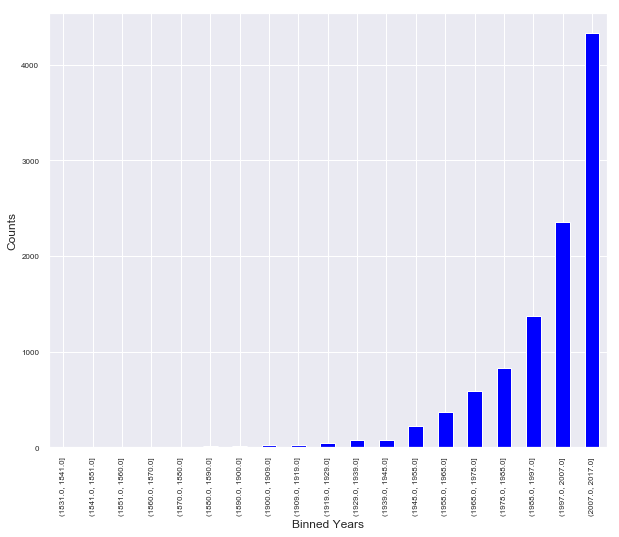

In [39]:
# let's look at the new distribution
fig, ax = plt.subplots()
X_yrs.sum().plot.bar(ax = ax, color = 'blue')
ax.tick_params(labelsize=8)
ax.set_xlabel('Binned Years', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)

- We have a sparse array of parsed field of study fields. We'll convert from a pandas DataFrame to a numpy sparse array to see if that helps to save on computation time.

In [40]:
X_fos = fos_features.values

In [41]:
# We can see how this will make a difference in the future by looking at the size of each
print('Our pandas Series, in bytes: ', getsizeof(fos_features))
print('Our hashed numpy array, in bytes: ', getsizeof(X_fos))

Our pandas Series, in bytes:  4902998648
Our hashed numpy array, in bytes:  112


In [42]:
X_yrs.shape[1] + X_fos.shape[1]

7623

In [43]:
# now looking at 10399 x  7623 array for our feature space

%time second_features = np.append(X_fos, X_yrs, axis = 1)

second_size = getsizeof(second_features)

print('Size of second feature array, in bytes: ', second_size)

Wall time: 288 ms
Size of second feature array, in bytes:  634172728


In [58]:
print("The power of feature engineering saves us, in bytes: ", first_size - second_size)

The power of feature engineering saves us, in bytes:  4369568810


In [59]:
model_df.loc[21]

abstract    A microprocessor includes hardware registers t...
authors                      [{'name': 'Mark John Ebersole'}]
fos         [Embedded system, Parallel computing, Computer...
keywords                                                 None
title       Microprocessor that enables ARM ISA program to...
year                                                     2013
Name: 21, dtype: object

In [60]:
model_df.iloc[21]

abstract    Summary#R##N##R##N#Background  Calcipotriol ha...
authors     [{'name': 'P.C.M. van de Kerkhof', 'org': 'Dep...
fos         [Randomization, Dermatology, Alternative medic...
keywords    [dermatologie, traitement, tratamiento, psoria...
title       A comparison of twice-daily calcipotriol ointm...
year                                                     2006
Name: 10022, dtype: object

In [61]:
model_df.index.get_loc(10022)

21

In [24]:
def piped_collab_filter(features_matrix, index, top_n):
                
    item_similarities = 1 - cosine_similarity(features_matrix[index:index+1], features_matrix).flatten() 
    related_indices = [i for i in item_similarities.argsort()[::-1] if i != index]

    return [(index, item_similarities[index]) for index in related_indices][0:top_n]

def paper_recommender(items_df, paper_index, top_n):
    if paper_index in model_df.index:
        
        print('Based on the paper:')
        print('Paper index = ', model_df.loc[paper_index].name)
        print('Title :', model_df.loc[paper_index]['title'])
        print('FOS :', model_df.loc[paper_index]['fos'])
        print('Year :', model_df.loc[paper_index]['year'])
        print('Abstract :', model_df.loc[paper_index]['abstract'])
        print('Authors :', model_df.loc[paper_index]['authors'], '\n')
        
        # define the location index for the DataFrame index requested
        array_ix = model_df.index.get_loc(paper_index)

        top_results = piped_collab_filter(items_df, array_ix, top_n)
        
        print('\nTop',top_n,'results: ') 
        
        order = 1
        for i in range(len(top_results)):
            print(order,'. Paper index = ', model_df.iloc[top_results[i][0]].name)
            print('Similarity score: ', top_results[i][1])
            print('Title :', model_df.iloc[top_results[i][0]]['title'])
            print('FOS :', model_df.iloc[top_results[i][0]]['fos'])
            print('Year :', model_df.iloc[top_results[i][0]]['year'])
            print('Abstract :', model_df.iloc[top_results[i][0]]['abstract'])
            print('Authors :', model_df.iloc[top_results[i][0]]['authors'], '\n')
            if order < top_n: order += 1
    
    else:
        print('Whoops! Choose another paper. Try something from here: \n', model_df.index[100:200])

In [28]:
paper_recommender(second_features, 2, 3)

Based on the paper:
Paper index =  2
Title : Should endometriosis be an indication for intracytoplasmic sperm injection (ICSI) in fresh IVF cycles
FOS : None
Year : 2015
Abstract : None
Authors : [{'name': 'Jovana P. Lekovich', 'org': 'Weill Cornell Medical College, New York, NY'}, {'name': 'G.D. Palermo', 'org': 'Weill Medical College of Cornell University, New York, NY'}, {'name': 'Nigel Pereira', 'org': 'The Ronald O. Perelman and Claudia Cohen Center, New York, NY'}, {'name': 'Zev Rosenwaks', 'org': 'Weill Cornell Medical College, New York, NY'}] 


Top 3 results: 
1 . Paper index =  14432
Similarity score:  1.0
Title : KIPPHEBELVORRICHTUNG FÜR BRENNKRAFTMASCHINE
FOS : None
Year : 2001
Abstract : None
Authors : [{'name': 'Sweetland D'}, {'name': 'Rasener M'}] 

2 . Paper index =  14156
Similarity score:  1.0
Title : Machine for removing and replacing piston wrist pins
FOS : None
Year : 1931
Abstract : None
Authors : [{'name': 'Earl O. Minor'}] 

3 . Paper index =  15431
Similarity 

# Take3

- tf-idf on abstract

In [68]:
second_features = np.load('second_features.npy', allow_pickle = True)

In [69]:
# need to fill in NaN for sklearn
filled_df = model_df.fillna('None')

In [70]:
vectorizer = TfidfVectorizer(sublinear_tf = True,
                             max_df = 0.5,
                             min_df = 10,
                             stop_words = 'english')

X_abstract = vectorizer.fit_transform(filled_df['abstract'])

X_abstract

<10399x5995 sparse matrix of type '<class 'numpy.float64'>'
	with 293240 stored elements in Compressed Sparse Row format>

In [71]:
print("n_samples: %d, n_features: %d" % X_abstract.shape)

n_samples: 10399, n_features: 5995


In [72]:
%%time
# now looking at 10399 x  356139 array for our feature space
third_features = np.append(second_features, X_abstract.toarray(), axis = 1)

Wall time: 2.56 s


In [73]:
third_features.shape

(10399, 13618)

- authors

In [74]:
authors_df = pd.DataFrame(filled_df.authors)
authors_df.head()

,authors
0,None
1,[{'name': 'Ahmed M. Alluwaimi'}]
10,"[{'name': 'Gyorgy Targoński'}, {'name': 'Marek..."
1000,"[{'name': 'Chung-Jen Wu'}, {'name': 'Wang Me'}..."
10001,"[{'name': 'Niramol Savaraj', 'org': 'Universit..."


In [88]:
authors_list = []

for row in authors_df.itertuples():
    # create a dictionary from each Series index
    if type(row.authors) is str:
        y = {'None': row.Index}
    if type(row.authors) is list:
        # add these keys + values to our running dictionary 
        y = dict.fromkeys(row.authors[0].values(), row.Index)
    authors_list.append(y)

In [89]:
authors_list[0:5]

[{'None': 0},
 {'Ahmed M. Alluwaimi': 1},
 {'Gyorgy Targoński': 10},
 {'Chung-Jen Wu': 1000},
 {'Niramol Savaraj': 10001,
  'University of Texas M. D. Anderson Cancer Center': 10001}]

In [90]:
v = DictVectorizer(sparse = False)
X_authors = v.fit_transform(authors_list)

X_authors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
print("n_samples: %d, n_features: %d" % X_authors.shape)

n_samples: 10399, n_features: 14028


In [93]:
%%time
# now looking at 5167 x  38070 array for our feature space
fourth_features = np.append(third_features, X_authors, axis = 1)

Wall time: 18.9 s


In [94]:
fourth_features.shape

(10399, 27646)

In [25]:
paper_recommender(fourth_features, 2, 3)

Based on the paper:
Paper index =  2
Title : Should endometriosis be an indication for intracytoplasmic sperm injection (ICSI) in fresh IVF cycles
FOS : None
Year : 2015
Abstract : None
Authors : [{'name': 'Jovana P. Lekovich', 'org': 'Weill Cornell Medical College, New York, NY'}, {'name': 'G.D. Palermo', 'org': 'Weill Medical College of Cornell University, New York, NY'}, {'name': 'Nigel Pereira', 'org': 'The Ronald O. Perelman and Claudia Cohen Center, New York, NY'}, {'name': 'Zev Rosenwaks', 'org': 'Weill Cornell Medical College, New York, NY'}] 


Top 3 results: 
1 . Paper index =  13734
Similarity score:  1.0
Title : An intrauterine developed rege rattorum in cats
FOS : None
Year : 1958
Abstract : None
Authors : [{'name': 'Kieslich-Dietz I'}] 

2 . Paper index =  2426
Similarity score:  1.0
Title : A positive influence: equipping parents to support young people's career transitions
FOS : ['Psychology', 'Nursing', 'Social psychology', 'Pedagogy']
Year : 2006
Abstract : This is th